### TFIDF -- MODELLING USING DECISION TREES

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
#import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import bz2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

In [2]:
infile=bz2.BZ2File("train_tfidfw2v","rb")
train_tfidfw2v=pickle.load(infile)
infile.close()

In [3]:
infile=bz2.BZ2File("ytrain","rb")
ytrain=pickle.load(infile)
infile.close()

In [4]:
infile=bz2.BZ2File("ytest","rb")
ytest=pickle.load(infile)
infile.close()

In [5]:
infile=bz2.BZ2File("test_tfidfw2v","rb")
test_tfidfw2v=pickle.load(infile)
infile.close()

In [6]:
test_tfidf.shape

(21850, 401)

In [7]:
gcv_max_depth=50
gcv_min_samples_split=350

In [8]:
tree=DecisionTreeClassifier(max_depth=gcv_max_depth,min_samples_split=gcv_min_samples_split,class_weight="balanced")

In [9]:
tree.fit(train_tfidfw2v,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
ytest_predictproba=tree.predict_proba(test_tfidfw2v)[:,1]
ytest_predict=tree.predict(test_tfidfw2v)

In [11]:
ytrain_predictproba=tree.predict_proba(train_tfidfw2v)[:,1]
ytrain_predict=tree.predict(train_tfidfw2v)


In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
train_auc=roc_auc_score(ytrain,ytrain_predictproba)
train_auc

0.7879707229039131

In [16]:
test_auc=roc_auc_score(ytest,ytest_predictproba)
test_auc

0.6068790834286213

##### CONFUSION_MATRIX

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(ytrain,ytrain_predict)

array([[ 8364,  2223],
       [21549, 37782]])

In [19]:
test_confusion=pd.DataFrame(confusion_matrix(ytest,ytest_predict),index=["actual_neg","actual_pos"],columns=["pred_neg","pred_pos"])
test_confusion

,pred_neg,pred_pos
actual_neg,1839,1469
actual_pos,7463,11079


In [20]:
train_confusion=pd.DataFrame(confusion_matrix(ytrain,ytrain_predict),index=["actual_neg","actual_pos"],columns=["pred_neg","pred_pos"])
train_confusion

,pred_neg,pred_pos
actual_neg,8364,2223
actual_pos,21549,37782


##### ROC_CURVE

In [21]:
from sklearn.metrics import roc_curve
fpr_train,tpr_train,thersholds_train=roc_curve(ytrain,ytrain_predictproba)
fpr_test,tpr_test,thersholds_test=roc_curve(ytest,ytest_predictproba)

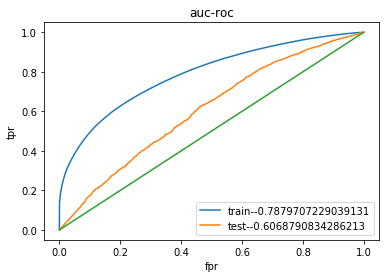

In [22]:
plt.plot(fpr_train,tpr_train,label="train--"+str(train_auc))
plt.plot(fpr_test,tpr_test,label="test--"+str(test_auc))
plt.plot([0.0,0.1,0.5,1.0],[0.0,0.1,0.5,1.0])
plt.legend()
plt.title("auc-roc")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()
plt.close()

In [24]:
# There is too much of difference in scoring between train and test data

### with  FALSE POSITIVES

In [25]:
a=set(test_tfidf[ytest==1 ].index) 
b=set(test_tfidf[ytest_predict==0 ].index)

In [26]:
len(a),len(b),len(test_tfidf)

(18542, 9302, 21850)

In [27]:
fp_index=set.intersection(a,b)
len(fp_index)

7463

In [28]:
infile=bz2.BZ2File("Xtest","rb")
fp_xtesw2v=pickle.load(infile)
infile.close()

In [29]:
fp_xtesw2v=pd.DataFrame(np.array(fp_xtes),columns=fp_xtes.columns).loc[sorted(fp_index)]

In [30]:
len(fp_xtesw2v)

7463

In [31]:
outfile=bz2.BZ2File("fp_xtesw2v","wb")
pickle.dump(fp_xtest,outfile)
outfile.close()


In [32]:
fp_xtesw2v["essay"]

0        my students wonderful group first second grade...
5        my students excited learn curious world around...
6        as teacher low income high poverty school dist...
14       i blessed faculty sponsor high school boys soc...
18       my 4th graders like move love read love lots p...
                               ...                        
21835    our school nurturing environment work instill ...
21842    i work students kindergarten fifth grade every...
21846    my students heroes my students inspiring peopl...
21847    my students amazing much teach i teaching curr...
21849    my students curious fifth sixth graders love h...
Name: essay, Length: 7463, dtype: object

### TFIDF--Modelling  after removing features with zero importance

In [33]:
features_index=np.where([tree.feature_importances_!=0])[1]

In [34]:
features=set(train_tfidfw2v.columns[features_index])


In [35]:
len(features)

230

In [36]:
testw2v=test_tfidfw2v[features]
test.shape

(21850, 231)

In [37]:
trainw2v=train_tfidfw2v[features]
train.shape

(69918, 231)

In [38]:
outfile=bz2.BZ2File("testw2v","wb")
pickle.dump(testw2v,outfile)
outfile.close()


In [39]:
outfile=bz2.BZ2File("trainw2v","wb")
pickle.dump(trainw2v,outfile)
outfile.close()


In [58]:
sgd=LogisticRegression(max_iter=1000)
gcv=GridSearchCV(estimator=sgd,param_grid={'C':[0.0001,0.001,0.01,0.1,1,10,100,1000]},scoring="roc_auc",n_jobs=-1,return_train_score=True)

In [59]:
ytrain=ytrain.reshape(69918,)

In [60]:
gcv.fit(trainw2v,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [61]:
gcv.cv_results_

{'mean_fit_time': array([ 1.60994306,  2.39048672,  4.21745515,  9.7130446 , 18.52156391,
        15.48103662, 15.44936209, 13.81601968]),
 'std_fit_time': array([0.32600026, 0.67642095, 0.89702572, 1.54824712, 0.89197662,
        1.45173543, 1.99932977, 1.36123314]),
 'mean_score_time': array([0.04839153, 0.04287891, 0.04041724, 0.04327359, 0.03386002,
        0.02876153, 0.02131867, 0.0183054 ]),
 'std_score_time': array([0.00657413, 0.00672454, 0.00638867, 0.0054881 , 0.01298222,
        0.00784807, 0.00414485, 0.00113321]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.64838052, 0.6759507 , 0.69827108, 0.70917618, 0.70968608,
        0.70904595, 0.70892662, 0.70895984]),

In [62]:
sgd=LogisticRegression(C=1,max_iter=1000)

In [63]:
sgd.fit(trainw2v,ytrain)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
train_pred=sgd.predict(trainw2v)

In [65]:
train_prob=sgd.predict_proba(trainw2v)[:,1]
train_prob

array([0.39920623, 0.95105542, 0.96522263, ..., 0.9059157 , 0.97263365,
       0.89288022])

In [66]:
auc_train=roc_auc_score(ytrain,train_prob)
auc_train

0.7118483198427238

In [67]:
testw2v.columns

Index([                   0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    7,                    8,
                         10,
       ...
                        290,                  291,                  293,
                        294,                  297,                 'ms',
                       'ms',  'previous_projects',                 'la',
       'college_careerprep'],
      dtype='object', length=231)

In [68]:
trainw2v.columns

Index([                   0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    7,                    8,
                         10,
       ...
                        290,                  291,                  293,
                        294,                  297,                 'ms',
                       'ms',  'previous_projects',                 'la',
       'college_careerprep'],
      dtype='object', length=231)

In [69]:
test_pred=sgd.predict(testw2v)

In [70]:
test_prob=sgd.predict_proba(testw2v)[:,1]
test_prob

array([0.79639179, 0.8428332 , 0.96080403, ..., 0.8470692 , 0.7682109 ,
       0.85210772])

In [71]:
auc_test=roc_auc_score(ytest,test_prob)
auc_test

0.7112744268804037

In [72]:
from sklearn.metrics import roc_curve
fpr_train,tpr_train,thersholds_train=roc_curve(ytrain,train_prob)
fpr_test,tpr_test,thersholds_test=roc_curve(ytest,test_prob)

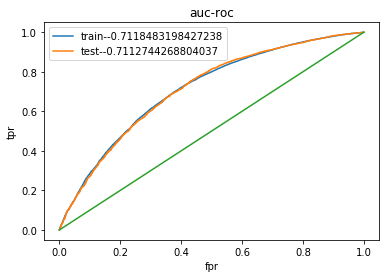

In [73]:
plt.plot(fpr_train,tpr_train,label="train--"+str(auc_train))
plt.plot(fpr_test,tpr_test,label="test--"+str(auc_test))
plt.plot([0.0,0.1,0.5,1.0],[0.0,0.1,0.5,1.0])
plt.legend()
plt.title("auc-roc")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()
plt.close()

In [74]:
train_confusion=pd.DataFrame(confusion_matrix(ytrain,train_pred),index=["actual_neg","actual_pos"],columns=["pred_neg","pred_pos"])
train_confusion

,pred_neg,pred_pos
actual_neg,134,10453
actual_pos,142,59189


In [75]:
test_confusion=pd.DataFrame(confusion_matrix(ytest,test_pred),index=["actual_neg","actual_pos"],columns=["pred_neg","pred_pos"])
test_confusion

,pred_neg,pred_pos
actual_neg,40,3268
actual_pos,43,18499
